In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import csv
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv("IRIS.csv",sep=",",encoding='utf-8')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [32]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [34]:
df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [35]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [36]:
df["sepal_length"]=df["sepal_length"].round(3)
df["sepal_width"]=df["sepal_width"].round(3)
df["petal_length"]=df["petal_length"].round(3)
df["petal_width"]=df["petal_width"].round(3)

In [37]:
numerical_data = []
object_data = []

for column in df.columns:
    if df.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

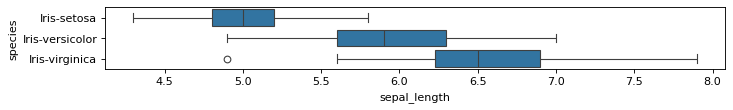

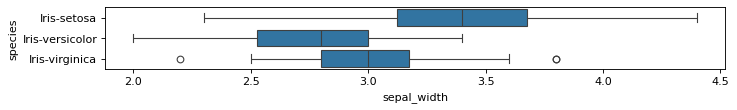

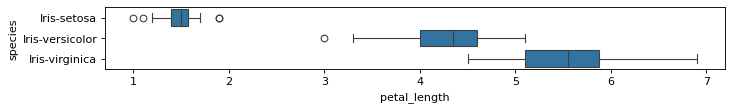

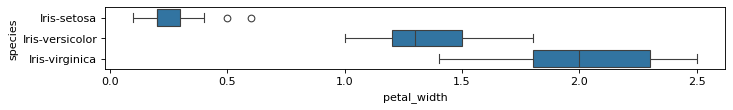

In [38]:
for i in range(0,len(numerical_data)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x = df[numerical_data[i]], y=df['species'], data = df,orient="h")
    plt.show()

<Axes: xlabel='count', ylabel='species'>

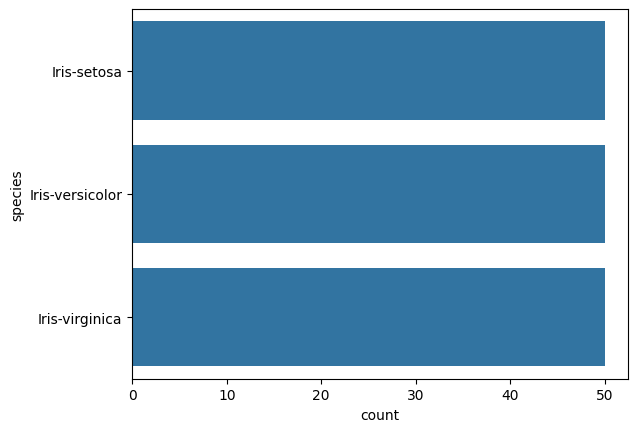

In [39]:
sns.countplot(df["species"])

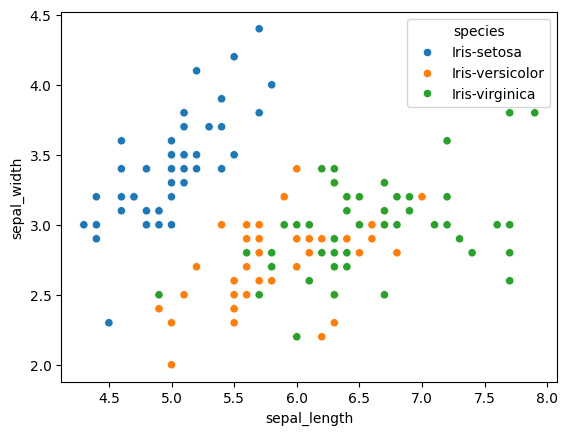

In [40]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

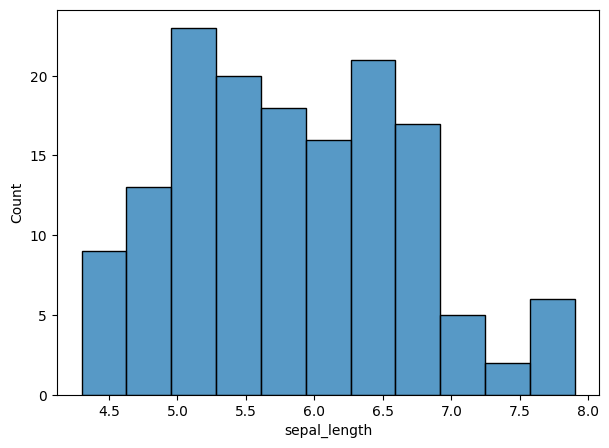

In [41]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='sepal_length', bins=11)

<Axes: xlabel='sepal_width', ylabel='Count'>

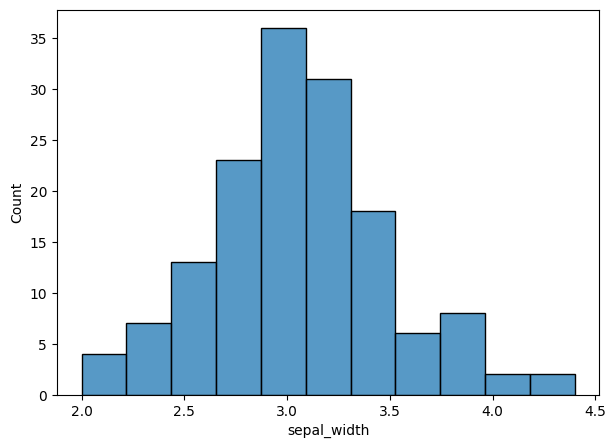

In [42]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='sepal_width', bins=11)

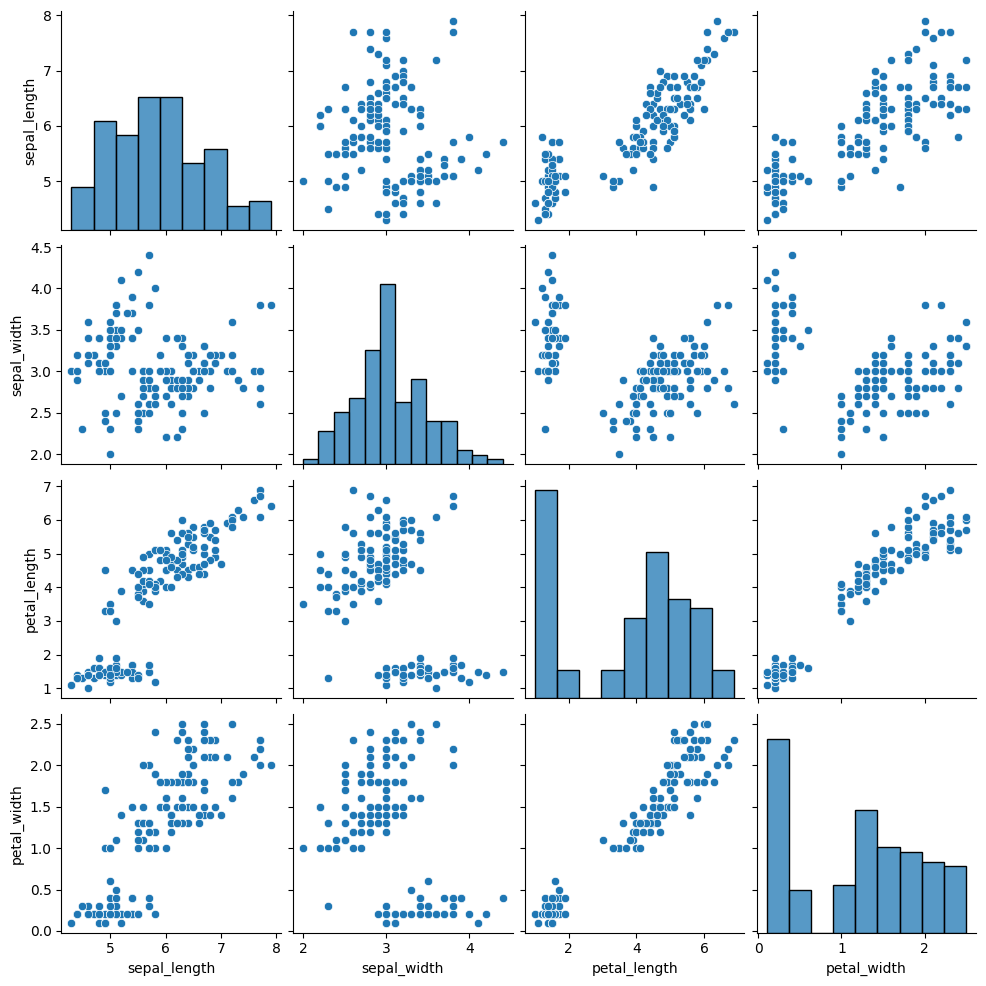

In [43]:
sns.pairplot(df)

<Axes: xlabel='petal_length', ylabel='Count'>

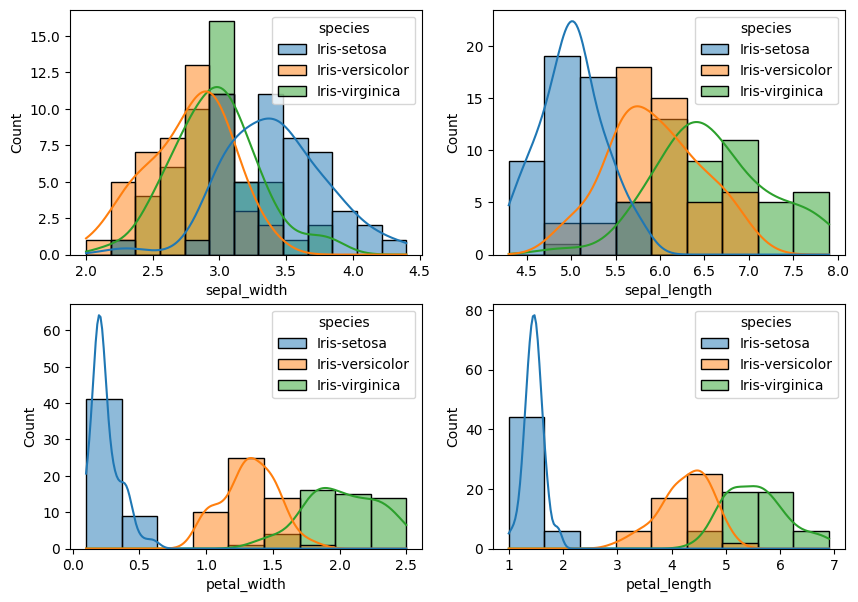

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(10,7))
sns.histplot(ax = axes[0,0],data=df,x ='sepal_width',hue='species',kde=True)
sns.histplot(ax = axes[0,1],data=df,x ='sepal_length',hue='species',kde=True)
sns.histplot(ax = axes[1,0],data=df,x ='petal_width',hue='species',kde=True)
sns.histplot(ax = axes[1,1],data=df,x ='petal_length',hue='species',kde=True)

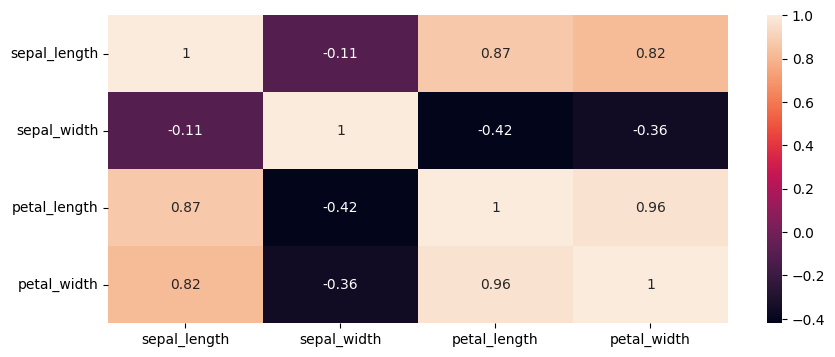

In [48]:
plt.figure(figsize=(10,4))
sns.heatmap(df.drop('species', axis=1).corr(),annot=True) # Drop the non-numeric 'species' column
plt.show()

In [49]:
X = df.drop(['species',"sepal_width"],axis=1)
y = df['species']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

1.0
1.0


In [52]:
y_pred_rf=RF.predict(X_test)
y_pred_rf

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [53]:
report = classification_report(y_test, y_pred_rf)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [54]:
df=pd.DataFrame({"y_pred_rf":y_pred_rf,"y_test":y_test})
df

,y_pred_rf,y_test
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor
